<a href="https://colab.research.google.com/github/jiw000/what-should-i-eat-today-/blob/main/%EC%98%A4%EB%8A%98_%EB%AD%90_%EB%A8%B9%EC%A7%80%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘 뭐 먹지?

**이 글은 파이썬으로 데이터 주무르기 책 내용을 응용하여 제작 되었습니다.


밥은 먹어야 하는데 무엇을 먹어야 할 지 고민하며 **오늘 뭐 먹지?**라는 생각을 해보신 적 있으신가요??

아마 대부분이 한번쯤은 해본 적 있으실 것이라고 생각합니다.

그래서 네이버 지식in에서 **오늘 뭐 먹지?**라고 물어 보았을 때 가장 많이 추천된 메뉴를 알아보려고 합니다.

진행 방식은 다음과 같습니다.

1.네이버 지식in에 오늘 뭐 먹지?라고 검색한 후 웹크롤링을 통해 데이터 수집

2.수집된 데이터를 konlpy를 통해 형태소 단위로 토큰화 한 후 워드 클라우드로 만들어 가장 많이 추천된 메뉴가 무엇인지 알아보기

3.word2vec를 활용하여 많이 추천된 메뉴외 유사한 단어를 알아보기



### 지식in에 '오늘 뭐 먹지'라고 검색한 후 해당 페이지 웹크롤링 하기

In [ ]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%matplotlib inline


In [ ]:
# 폰트 설정
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

plt.rc('font', family=font_name)

In [ ]:
fm._rebuild()
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# 웹 크롤링
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time

In [ ]:
from tqdm import tqdm_notebook

eat_text= []

tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&kin_display=10&qt=&title=0&&answer=0&grade=0&choice=0&sec=0&nso=so%3Ar%2Ca%3Aall%2Cp%3Aall&query={key_word}%3F&c_id=&c_name=&sm=tab_pge&kin_start={num}&kin_age=0'

for n in tqdm_notebook(range(1, 1000, 10)): #1000개의 검색 결과 읽어오기
  response = urlopen(html.format(num=n, key_word=urllib.parse.quote('오늘 뭐 먹지')))
  soup = BeautifulSoup(response, "html.parser")
  tmp = soup.find_all('ul',class_='lst_total _list')

  for line in tmp:
    eat_text.append(line.text)

  time.sleep(0.5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
eat_text

["    Q  문서 저장하기  Keep에 저장 Keep 바로가기    오늘 뭐 먹지     1:1  A    미식큐      오늘 뭐 먹지? 고민하지 말고 내 취향에 맞는 맞춤 추천으로 해결하자! AI기술로 음식취향을 분석해서맞춤 추천해주는 '미식큐'를 통해서 무료로 메뉴 추천 받아보세요! 단순한 랜덤추천이 아닌 개인 음식 취향을 분석해서 내가 싫어하는 메뉴는 제외하고 좋아할 만한 메뉴들을 배달메뉴, 야식메뉴...  2022.04.26.         Q  문서 저장하기  Keep에 저장 Keep 바로가기    오늘 뭐 먹지 오늘 뭐먹을지 추천해주세요 추천 부탁드려요 구체적일수록 좋아요     1:1  A      ye_k****      친구랑 만든 홈페이지에요!! 뭐먹을지 고민될때 놀러오세요~! https://random-menu-selector.netlify.app/  2022.06.23.         Q  문서 저장하기  Keep에 저장 Keep 바로가기    오늘 뭐먹지 i'm still hungry 나는 아직 배가 고프다     1:1  A     식물신  ConSin      1.오늘 뭐먹지 =저는 치즈돈까스를 추천드리고 싶네요. 코로나 조심하시고 좋은하루 되세요.  2022.02.09.         Q  문서 저장하기  Keep에 저장 Keep 바로가기    오늘저녁은뭐먹지,,쩝 오늘 저녁은 뭐먹지,,배고프다,,     1:1  A      nemj****      배고플 땐 떡볶이도 좋아요. 전 요새 길다란 가래떡 떡볶이를 자주 먹네요. ㅎ http://m.site.naver.com/0K8ni  2022.03.28.          Q오늘 저녁 뭐먹지 뭐먹지?-?  2022.06.09.        Q오늘 뭐먹지? 저녁메뉴 오늘 저녁 뭐먹을까요? 친구랑 사먹을건데 메뉴고르기 너무 어려워요  2022.06.04.        Q오늘 저녁 뭐먹지?  2022.03.16.        Q오늘 저녁 뭐 먹지? 안녕하세요 오늘 다이어트하고 오는 초

### 수집된 데이터를 konlpy를 통해 형태소 단위로 토큰화 한 후 워드 클라우드 만들기

In [ ]:
# 한국어 자연어 처리를 위한 konlpy 설치
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
from konlpy.tag import Twitter; t=Twitter()

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [ ]:
# 하나의 텍스트로 작성
ate_text = ''

for each_line in eat_text[:1000]:
  ate_text = ate_text + each_line + '\n'

In [ ]:
# 토큰 모으기
tokens_ko = t.morphs(ate_text)
tokens_ko

['Q',
 '문서',
 '저장',
 '하기',
 'Keep',
 '에',
 '저장',
 'Keep',
 '바로가기',
 '오늘',
 '뭐',
 '먹지',
 '1:1',
 'A',
 '미식',
 '큐',
 '오늘',
 '뭐',
 '먹지',
 '?',
 '고민',
 '하지',
 '말고',
 '내',
 '취향',
 '에',
 '맞는',
 '맞춤',
 '추천',
 '으로',
 '해결',
 '하자',
 '!',
 'AI',
 '기술',
 '로',
 '음식',
 '취향',
 '을',
 '분석',
 '해서',
 '맞춤',
 '추천',
 '해주는',
 "'",
 '미식',
 '큐',
 "'",
 '를',
 '통해',
 '서',
 '무료',
 '로',
 '메뉴',
 '추천',
 '받아',
 '보세요',
 '!',
 '단순한',
 '랜덤',
 '추천',
 '이',
 '아닌',
 '개인',
 '음식',
 '취향',
 '을',
 '분석',
 '해서',
 '내',
 '가',
 '싫어하는',
 '메뉴',
 '는',
 '제외',
 '하고',
 '좋아할',
 '만',
 '한',
 '메뉴',
 '들',
 '을',
 '배달',
 '메뉴',
 ',',
 '야식',
 '메뉴',
 '...',
 '2022.04',
 '.',
 '26',
 '.',
 'Q',
 '문서',
 '저장',
 '하기',
 'Keep',
 '에',
 '저장',
 'Keep',
 '바로가기',
 '오늘',
 '뭐',
 '먹지',
 '오늘',
 '뭐',
 '먹을지',
 '추천',
 '해주세요',
 '추천',
 '부탁드려요',
 '구체',
 '적',
 '일수록',
 '좋아요',
 '1:1',
 'A',
 'ye',
 '_',
 'k',
 '****',
 '친구',
 '랑',
 '만든',
 '홈페이지',
 '에요',
 '!!',
 '뭐',
 '먹을지',
 '고민',
 '될',
 '때',
 '놀러',
 '오세요',
 '~!',
 'https://random-menu-selector.netlify.app/',
 '2022.06',


In [ ]:
ko = nltk.Text(tokens_ko, name="오늘 뭐 먹지")
print(len(ko.tokens)) #토큰으로 모은 단어의 총 개수
print(len(set(ko.tokens))) # 중복 단어를 뺀 개수

47997
5025


In [ ]:
# 가장 많이 사용된 단어 보기
ko = nltk.Text(tokens_ko, name = '오늘 뭐 먹지')
ko.vocab().most_common(100)

[('.', 2611),
 ('저장', 2001),
 ('Keep', 2001),
 ('뭐', 1655),
 ('오늘', 1557),
 ('에', 1325),
 ('먹지', 1193),
 ('Q', 1008),
 ('하기', 1004),
 ('문서', 1000),
 ('바로가기', 1000),
 ('A', 995),
 ('1:1', 983),
 ('?', 817),
 ('저녁', 578),
 ('****', 436),
 ('추천', 395),
 ('이', 374),
 (',', 362),
 ('점심', 251),
 ('요', 244),
 ('은', 229),
 ('...', 227),
 ('을', 214),
 ('먹을까요', 200),
 ('좀', 192),
 ('!', 184),
 ('신', 182),
 ('는', 179),
 ('가', 175),
 ('~', 170),
 ('치킨', 165),
 ('저', 150),
 ('도', 147),
 ('로', 123),
 ('음식', 123),
 ('에서', 123),
 ('를', 117),
 ('1', 115),
 ('고민', 111),
 ('들', 110),
 ('만', 100),
 ('먹을지', 98),
 ('떡볶이', 96),
 ('의', 94),
 ('브레드', 88),
 ('메뉴', 87),
 ('보세요', 85),
 ('밥', 84),
 ('2021.03', 82),
 ('??', 82),
 ('한', 81),
 ('..', 81),
 ('으로', 80),
 ('것', 80),
 ('~~', 79),
 ('07', 79),
 (')', 79),
 ('나', 78),
 ('3', 77),
 ('해주세요', 76),
 ('입니다', 76),
 ('(', 76),
 ('중', 73),
 ('<', 72),
 ('합니다', 71),
 ('때', 70),
 ('>', 69),
 ('2', 69),
 ('하고', 68),
 ('라면', 66),
 ('한번', 66),
 ('수호', 66),
 ('2021.04',

In [ ]:
# 쓸모 없는 단어 제거
stop_words = ['.','하루','요리','먹을까','채택','재료','만들어','많이','도움','내공','시켜','다른','저장','Keep','뭐','오늘','먹지','에','Q','하기','문서','바로가기','A','1:1','?','저녁','****','추천',',','이','점심','요','...','은','을','좀','먹을까요','신','!','가','~','는','도','저','에서','들','고민','로','를','1','..','먹을지','만','의','보세요','한','2021.03','것','나','~~','07','??',')',')','해주세요','하고','입니다','(','한번','3','중','합니다','때','수호','<','>','20','-','네','!!','2021.04','2','드셔','샵','2019.10','^^','드세요','직접','식물','코로나','♡','/','집','인데','제','해서','랑','거','2020.05','06','으로','다','수','안녕하세요','12','10','잘','먹을','03','2020.06','2021.05']

tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='오늘 뭐 먹지')
ko.vocab().most_common(100)

[('치킨', 165),
 ('음식', 123),
 ('떡볶이', 96),
 ('브레드', 88),
 ('메뉴', 87),
 ('밥', 84),
 ('라면', 66),
 ('배달', 64),
 ('먹고', 64),
 ('피자', 58),
 ('노래', 57),
 ('맛있는', 55),
 ('에어', 50),
 ('프라이어', 50),
 ('드립니다', 47),
 ('국밥', 47),
 ('안', 44),
 ('뭘', 44),
 ('좋은', 43),
 ('파스타', 43),
 ('04', 42),
 ('하신', 42),
 ('전', 40),
 ('17', 40),
 ('와', 40),
 ('2020.07', 40),
 ('너무', 39),
 ('짜장면', 39),
 ('25', 39),
 ('먹죠', 39),
 ('과', 38),
 ('우주', 38),
 ('온라인', 38),
 ('05', 38),
 ('09', 37),
 ('2021.08', 37),
 ('해', 37),
 ('이랑', 37),
 ('에는', 37),
 ('알려주세요', 37),
 ('choi', 37),
 ('=', 36),
 ('까지', 36),
 ('면', 36),
 ('김치찌개', 36),
 ('식사', 36),
 ('있는', 36),
 ('여', 36),
 ('빵집', 36),
 ('들러', 36),
 ('지금', 36),
 ('샐러드', 35),
 ('대신', 35),
 ('맛', 35),
 ('ㅎㅎ', 34),
 ('탕', 34),
 ('드시고', 34),
 ('아', 34),
 ('초밥', 34),
 ('24', 34),
 ('절', 33),
 ('라', 33),
 ('고', 33),
 ('멋남', 33),
 ('26', 32),
 ('13', 32),
 ('만들어서', 32),
 ('싶으시면', 32),
 ('아래', 32),
 ('08', 32),
 ('햄버거', 32),
 ('23', 31),
 ('싶네요', 31),
 ('땐', 31),
 ('어떻게', 31),
 ('성

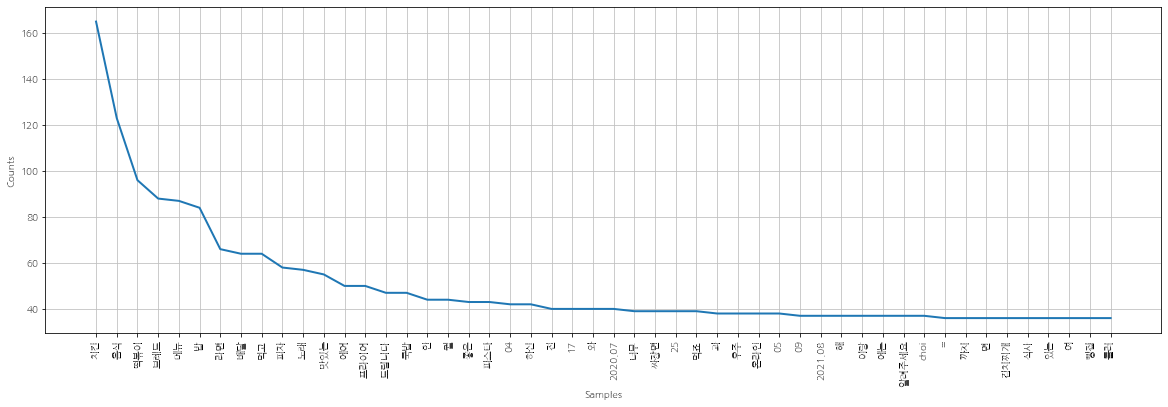

In [ ]:
# 등장 빈도수 그래프 그리기
plt.figure(figsize=(20,6))
ko.plot(50)
plt.show()

In [ ]:
# 워드 클라우드 만들기
from wordcloud import WordCloud, STOPWORDS

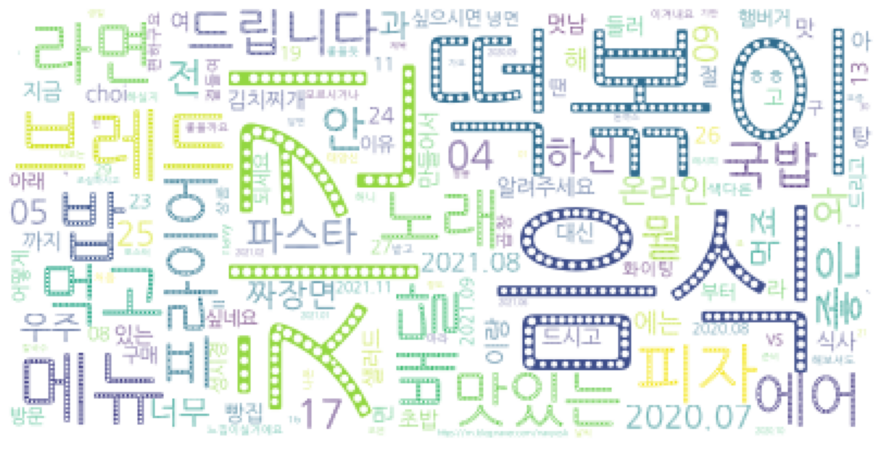

In [ ]:
data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',relative_scaling = 0.5, background_color = 'white').generate_from_frequencies(dict(data))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

치킨, 떡볶이, 라면 순으로 추천이 많이 되었다는 것을 확인할 수 있습니다.

### word2vec를 활용하여 많이 추천된 메뉴와 유사한 단어 알아보기

In [ ]:
import gensim
from gensim.models import word2vec

In [ ]:
# 조사, 어미 등 제거하기

twitter = Twitter()
results = []
lines = eat_text

for line in lines:
  malist = twitter.pos(line, norm=True, stem= True)
  r = []

  for word in malist:
    if not word[1] in ["Josa",'Eomi','Punctuation']:
      r.append(word[0])

  r1 = (" ".join(r)).strip()
  results.append(r1)
  print(r1)

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


Q 문서 저장 하다 Keep 저장 Keep 바로가기 오늘 뭐 먹다 1:1 A 미식 큐 오늘 뭐 먹다 고민 하다 내 취향 맞다 맞춤 추천 해결 하다 AI 기술 음식 취향 분석 하다 맞춤 추천 해주다 미식 큐 를 통해 무료 메뉴 추천 받다 보다 단순하다 랜덤 추천 아니다 개인 음식 취향 분석 하다 내 싫어하다 메뉴 제외 좋아하다 만 메뉴 들 배달 메뉴 야식 메뉴 2022.04 26 Q 문서 저장 하다 Keep 저장 Keep 바로가기 오늘 뭐 먹다 오늘 뭐 먹다 추천 해주다 추천 부탁드리다 구체 적 좋다 1:1 A ye k 친구 만들다 홈페이지 뭐 먹다 고민 되다 때 놀다 오다 https://random-menu-selector.netlify.app/ 2022.06 23 Q 문서 저장 하다 Keep 저장 Keep 바로가기 오늘 뭐 먹다 i m still hungry 나 아직 배 고프다 1:1 A 식물 신 ConSin 1 오늘 뭐 먹다 저 치즈 돈까스 추천 드리다 싶다 코로나 조심하다 좋다 하루 되다 2022.02 09 Q 문서 저장 하다 Keep 저장 Keep 바로가기 오늘 저녁 뭐 먹다 쩝 오늘 저녁 뭐 먹다 배고프다 1:1 A nemj 배고프다 땐 떡볶이 좋다 전 요새 길다 가래떡 떡볶이 자주 먹다 ㅎ http://m.site.naver.com/0K8ni 2022.03 28 Q 오늘 저녁 뭐 먹다 뭐 먹다 2022.06 09 Q 오늘 뭐 먹다 저녁 메뉴 오늘 저녁 뭐 먹다 친구 사먹다 메뉴 고르다 너무 어렵다 2022.06 04 Q 오늘 저녁 뭐 먹다 2022.03 16 Q 오늘 저녁 뭐 먹다 안녕하다 오늘 다이어트 오다 초딩 6 학년 이다 다이어트 하다 그렇다 먹다 싶다 엄청 많다 ㅎㅎ 뭐 먹다 정 해주다 2020.05 17 이전 다음 관련 저녁 Q 문서 저장 하다 Keep 저장 Keep 바로가기 오늘 뭐 먹다 오늘 저녁 뭐 먹다 추천 좀 1:1 A ye k 여기 나오다 들다 보다 직접 친구 만들다 싸이트 용 도움 되다 https://random-menu-se

In [ ]:
# 데이터 저장
data_file = 'ate_data'
with open(data_file,"w",encoding='utf-8') as fp:
  fp.write('\n'.join(results))

In [ ]:
# word2vec 실행 및 저장
data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, size = 200, window=10, hs=1, min_count=2, sg=1)

model.save('ate.model')

In [ ]:
model = word2vec.Word2Vec.load("ate.model")

In [ ]:
model.most_similar(positive=['떡볶이']) # 떡볶이는 같은 분식인 순대와 가장 유사한 것으로 나타났습니다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('순대', 0.8931644558906555),
 ('양푼', 0.8424169421195984),
 ('스파게티', 0.8419761657714844),
 ('8', 0.8369143009185791),
 ('비빔밥', 0.8357869386672974),
 ('카레', 0.8330034017562866),
 ('짜장면', 0.8297207355499268),
 ('다르다', 0.8277820348739624),
 ('둥이', 0.8224417567253113),
 ('rosa', 0.8201602101325989)]

In [ ]:
model.most_similar(positive=['치킨']) # 치킨은 피자와 유사한 단어로 나타났습니다. 또한 뿌링클이라는 유명한 치킨 메뉴도 유사한 단어로 나왔습니다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('피자', 0.8898101449012756),
 ('공주', 0.879104733467102),
 ('족발', 0.8767111301422119),
 ('뿌', 0.86534583568573),
 ('링클', 0.8647779226303101),
 ('반려동물', 0.8612174391746521),
 ('비빔밥', 0.8567604422569275),
 ('축하', 0.8558353185653687),
 ('요정', 0.854647696018219),
 ('카레', 0.8535336256027222)]

In [ ]:
model.most_similar(positive=['라면']) #라면은 뜨거운 음식인 만큼 뜨끈하다, 짬뽕 같은 단어가 유사한 단어로 나타났습니다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('2021.09', 0.9103461503982544),
 ('짬뽕', 0.8859274387359619),
 ('Ssoo', 0.8824560046195984),
 ('뜨끈하다', 0.8823477625846863),
 ('inwha', 0.8781032562255859),
 ('막창', 0.8772160410881042),
 ('님들', 0.876723051071167),
 ('ㅣㅣㅣ', 0.8730263710021973),
 ('alsw', 0.871450662612915),
 ('어떤', 0.871234655380249)]

여기까지 오늘 뭐 먹지?라는 주제로 네이버 지식in을 통해 사람들이 추천하는 메뉴를 살펴보았습니다.

역시 연간 1인당 라면 소비량 2위(78개) 답게 라면을 추천하는 사람들이 많았고

치킨, 떡볶이도 평소에 부담없이 간단하고 맛있게 먹을 수 있는 음식인 만큼 추천하는 사람도 많았던 것 같습니다.